# Introduction

Anime has grown into a global entertainment source for millions of fans around the world. With thousands of titles spanning a wide variety of genres—such as action, comedy, romance, fantasy, and more there is something for everyone. As the anime community continues to expand, more people are discovering and enjoying unique series, each with its own storytelling style and emotional impact. From online discussion forums to large-scale conventions, anime has inspired an entire culture of fan engagement and community-building.

However, navigating the vast world of anime can be overwhelming, especially for new viewers. One of the biggest challenges is choosing what to watch, which often depends on how shows are categorized by genre. While genre labels provide helpful guidance, they can be subjective and inconsistent especially when a show blends multiple elements or when official classifications are unclear. This includes people labeling certain anime as something else than what it is labeled. This ambiguity can make it difficult for viewers to find anime that matches their interests, and for platforms to recommend suitable titles


The goal of this project is to develop a machine learning system that can automatically classify anime into genres based on metadata features within the dataset. Using a dataset from Kaggle, we will train and evaluate two algorithms K-Nearest Neighbors (KNN) and Logistic Regression to predict the primary genre of an anime. These models will analyze characteristics such as rating, episode count, source material, and popularity to generate genre predictions. By comparing the performance of both models and examining their strengths and limitations, we hope to provide insights into the use of machine learning for genre classification and explore its potential applications in content recommendation systems.




# Data Introduction

#### **Link to the Kaggle Dataset:** 
#### https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset

The dataset used in this project contains 24 columns, each representing different features related to anime series sourced from the popular anime platform *MyAnimeList (MAL)*. MAL is a well-known and widely used website within the anime community, primarily for its functionality in helping users catalog, rate, and discover anime. It offers detailed listings for thousands of anime titles, including information on genres, airing dates, studios, episode counts, and more. In addition to being a tracking tool, MAL serves as a hub for anime-related content such as user reviews, discussion forums, seasonal previews, and articles making it a valuable resource for casual fans and enthusiasts.

The dataset includes over 10,000 individual anime entries, each representing a unique title listed on the site. Some of the key features in the dataset include type (e.g., TV, movie, OVA), source (e.g., manga, original, visual novel), score (average user rating), members (number of users who have added the show to their list), and genre, which is the target variable for this project. These features offer rich and diverse information that can be used to identify patterns and train models to predict the most likely genre classification for a given anime. By analyzing and processing this data, the project aims to uncover relationships between these attributes and genre categories, ultimately enabling automated and data-driven genre classification.



In [301]:
import pandas as pd 
import seaborn as sb

data_filepath = "../ITSC3156/anime-dataset-2023.csv"
data = pd.read_csv(data_filepath)
df = pd.DataFrame(data)

In [303]:
df.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [305]:
df.head(3)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


### Data Preprocessing

Before continuing I will drop redundant features. Features like synopsis and others that do not have any importance will be dropped to simplify the dataset and remove unnecessary noise that can interfere with training and accuracy. 

In [307]:
df = df.drop(['Synopsis', 'Aired', 'Studios', 'Other name', 'Duration', 'Premiered', 'Favorites', 'Status', 'Producers', 'Licensors', 'Image URL', 'anime_id', 'Rank', 'Popularity' , 'Image URL', 'Rating'], axis = 1)

In [309]:
df

,Name,English name,Score,Genres,Type,Episodes,Source,Scored By,Members
0,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Original,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,1.0,Original,206248.0,360978
2,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Manga,356739.0,727252
3,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Original,42829.0,111931
4,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Manga,6413.0,15001
...,...,...,...,...,...,...,...,...,...
24900,Wu Nao Monu,UNKNOWN,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,15.0,Web manga,UNKNOWN,0
24901,Bu Xing Si: Yuan Qi,Blader Soul,UNKNOWN,"Action, Adventure, Fantasy",ONA,18.0,Web novel,UNKNOWN,0
24902,Di Yi Xulie,The First Order,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,16.0,Web novel,UNKNOWN,0
24903,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,UNKNOWN,Music,1.0,Original,UNKNOWN,0


Due to the genre feature having "unknown" in some rows this needs to be addressed before continuing  so it is easier to work with the dataset and no complications come with calculations. Due to this project being based on the genre prediction this will be the first unknown resolution since we essentially need this column to make predictions.  

In [331]:
df = df[df['Genres'].str.lower() != 'unknown']

In [317]:
df

,Name,English name,Score,Genres,Type,Episodes,Source,Scored By,Members
0,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Original,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,1.0,Original,206248.0,360978
2,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Manga,356739.0,727252
3,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Original,42829.0,111931
4,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Manga,6413.0,15001
...,...,...,...,...,...,...,...,...,...
24898,Thailand,UNKNOWN,UNKNOWN,Avant Garde,Music,1.0,Original,UNKNOWN,0
24899,Energy,UNKNOWN,UNKNOWN,Avant Garde,Music,1.0,Original,UNKNOWN,0
24900,Wu Nao Monu,UNKNOWN,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,15.0,Web manga,UNKNOWN,0
24901,Bu Xing Si: Yuan Qi,Blader Soul,UNKNOWN,"Action, Adventure, Fantasy",ONA,18.0,Web novel,UNKNOWN,0


Now I will drop the unknown values in the score, scored by, members, and episode columns since in the next steps or preprocessing we will be using numeric values to create visualizations to describe relationships to genres. By using the numeric values it will make the process smoother since the unknown values that provide no information will be removed. 

In [333]:
df = df[df['Score'] != 'UNKNOWN']

In [335]:
df = df[df['Scored By'] != 'UNKNOWN']

In [337]:
df = df[df['Members'] != 'UNKNOWN']

In [338]:
df = df[df['Episodes'] != 'UNKNOWN']

In [341]:
df

,Name,English name,Score,Genres,Type,Episodes,Source,Scored By,Members
0,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Original,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,1.0,Original,206248.0,360978
2,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Manga,356739.0,727252
3,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Original,42829.0,111931
4,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Manga,6413.0,15001
...,...,...,...,...,...,...,...,...,...
24539,One Piece: Dai Gekisen Tokushuu! Zoro vs. Ooka...,One Piece: Recapping Fierce Fights! Zoro vs. a...,6.47,"Action, Adventure, Comedy, Fantasy",Special,1.0,Manga,722.0,1367
24557,Gensou Mangekyou: The Memories of Phantasm,Touhou Fantasy Kaleidoscope: The Memories of P...,7.78,Fantasy,OVA,18.0,Game,662.0,2492
24579,Mashle: Mash Burnedead to Fushigi na Tegami,Mashle: Magic and Muscles - Mash Burnedead and...,5.84,"Action, Comedy, Fantasy",Special,1.0,Manga,1971.0,3828
24590,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,Lee's Detective Agency: A Day in Lungmen - Hom...,5.99,"Action, Comedy, Mystery",ONA,1.0,Game,129.0,518


Now the numeric values we will be using to create a heatmap to show genre variation will be,, score, episodes, scored by, and members. Score will be used since this directly reflects audience reception of the series, higher scores = more enjoyed series which could reflect certain genres. Episode count can influence the genre as well since certain genres will have longer or more seasons (normal seasons have about 12 episodes) depending on the story. This ties into the score as well since if a show is highly approved by viewers it tends to get more episodes. Scored by and member count will also help indicate the genre since if a certain show in a genre has more members and scored by users, it can indicate the popularity leading to more genre indicators. 

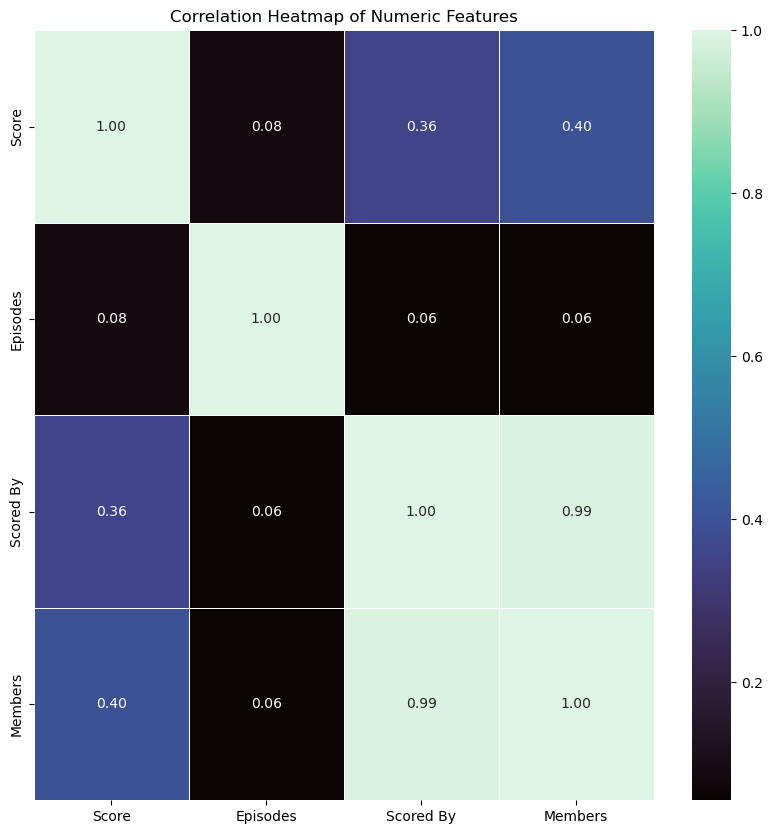

In [343]:
import matplotlib.pyplot as plt

num_df = df[['Score', 'Episodes', 'Scored By', 'Members']]

correlation = num_df.corr()

plt.figure(figsize = (10, 10))
sb.heatmap(correlation, annot = True, cmap = 'mako', fmt = ".2f", linewidths = 0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Above is a heatmap that shows the correlation between the numeric features that can indicate the anime genre. Next bar charts will be created for each numeric feature to show the correlations with each and genres for examples to get an idea of the visualizations and correlations with these sample features and the genres. 

In [345]:
#For obvious purposes mainly for school, certain genres will dropped below this comment due to inappropriate details

genre_df = df['Genres'].str.get_dummies(sep = ', ')

genres_to_drop = ['Girls Love', 'Boys Love', 'Erotica', 'Hentai', 'Ecchi']
genre_df = genre_df.drop(columns=genres_to_drop, errors = 'ignore')

df_encoded = pd.concat([df, genre_df], axis = 1)

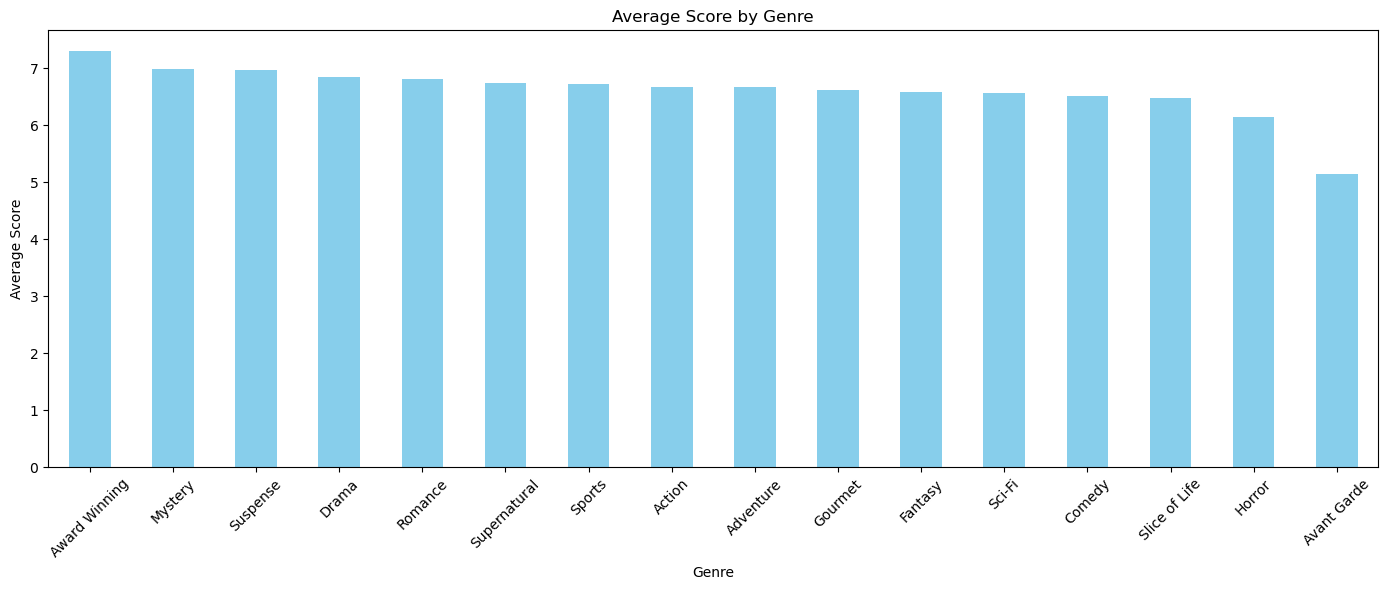

In [347]:
df_encoded['Score'] = pd.to_numeric(df_encoded['Score'], errors = 'coerce')
df_encoded = df_encoded.dropna(subset=['Score'])

genre_score_means = {
    genre: df_encoded[df_encoded[genre] == 1]['Score'].mean()
    for genre in genre_df.columns
}

pd.Series(genre_score_means).sort_values(ascending=False).plot(
    kind = 'bar',
    figsize = (14, 6),
    color = 'skyblue',
    title = 'Average Score by Genre'
)
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

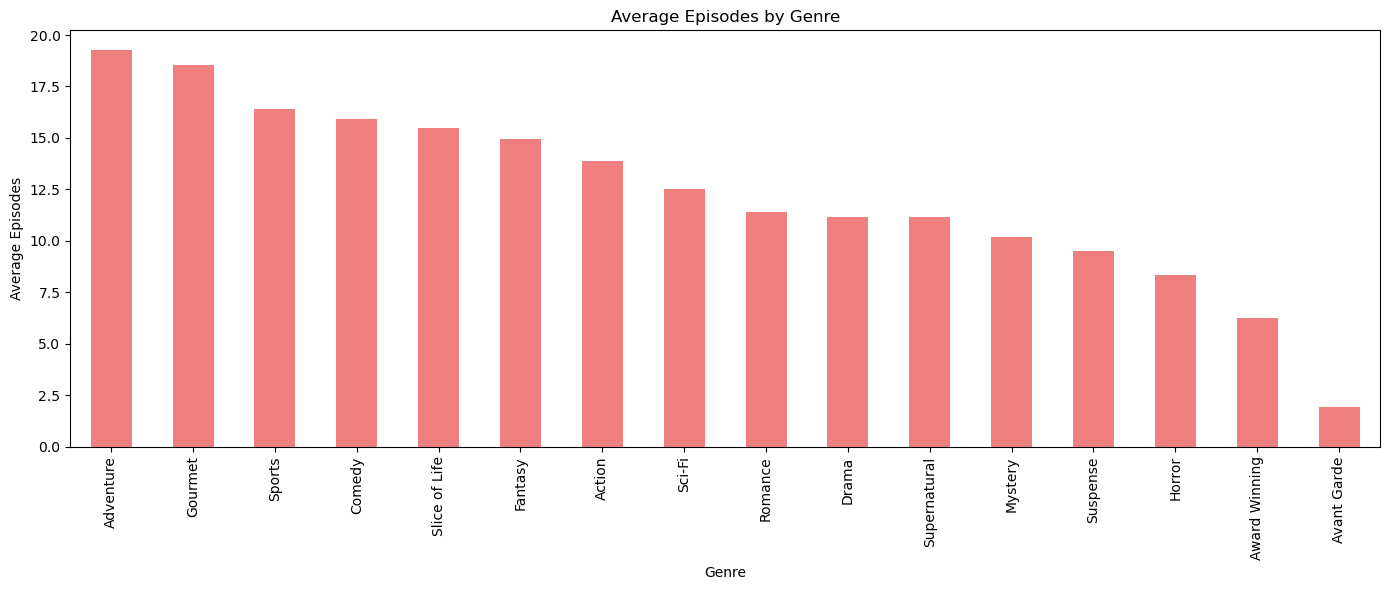

In [349]:
df_encoded['Episodes'] = pd.to_numeric(df_encoded['Episodes'], errors = 'coerce')
df_encoded = df_encoded.dropna(subset = ['Episodes'])

genre_episodes_means = {
    genre: df_encoded[df_encoded[genre] == 1]['Episodes'].mean()
    for genre in genre_df.columns
}

pd.Series(genre_episodes_means).sort_values(ascending=False).plot(
    kind='bar', figsize = (14, 6), color = 'lightcoral'
)
plt.title('Average Episodes by Genre')
plt.ylabel('Average Episodes')
plt.xlabel('Genre')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

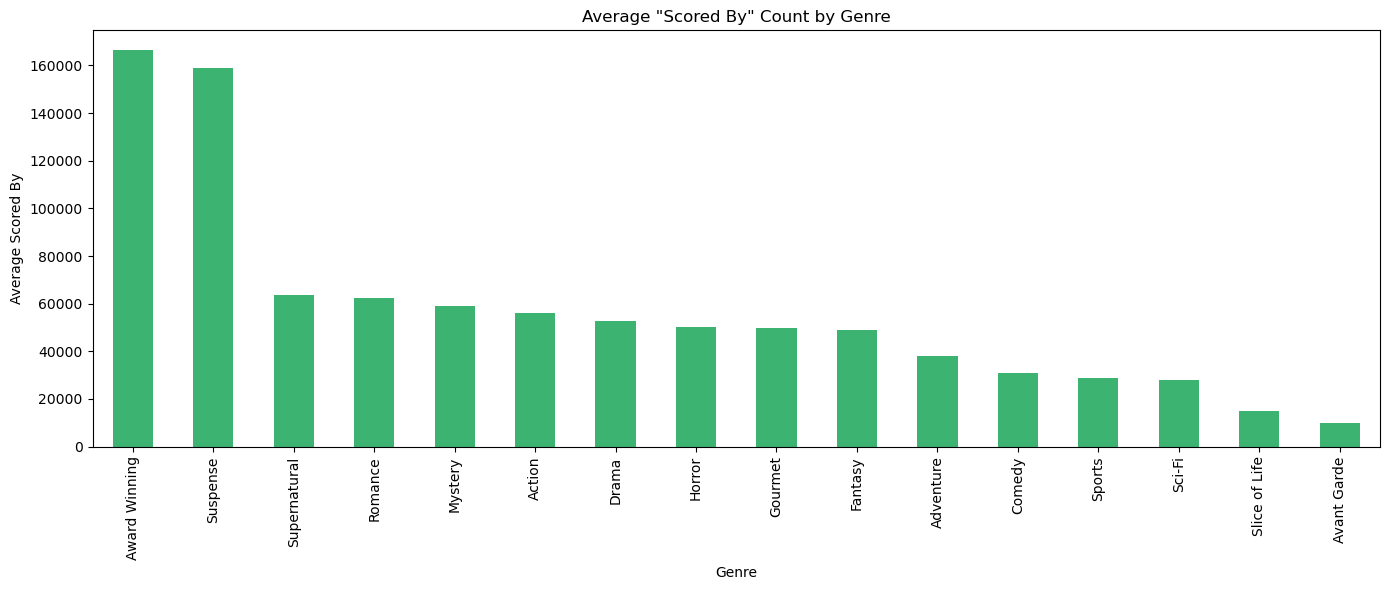

In [351]:
df_encoded['Scored By'] = pd.to_numeric(df_encoded['Scored By'], errors = 'coerce')
df_encoded = df_encoded.dropna(subset = ['Scored By'])

genre_scoredby_means = {
    genre: df_encoded[df_encoded[genre] == 1]['Scored By'].mean()
    for genre in genre_df.columns
}

pd.Series(genre_scoredby_means).sort_values(ascending=False).plot(
    kind='bar', figsize = (14, 6), color='mediumseagreen'
)
plt.title('Average "Scored By" Count by Genre')
plt.ylabel('Average Scored By')
plt.xlabel('Genre')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

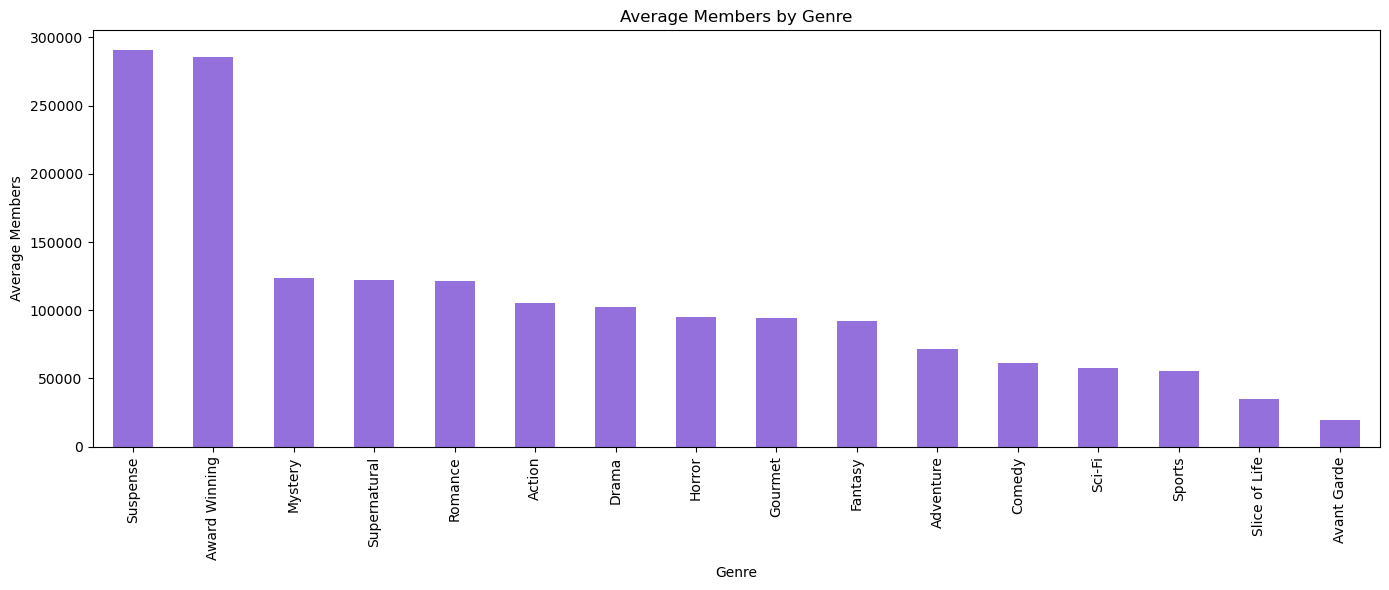

In [353]:
df_encoded['Members'] = pd.to_numeric(df_encoded['Members'], errors = 'coerce')
df_encoded = df_encoded.dropna(subset = ['Members'])

genre_members_means = {
    genre: df_encoded[df_encoded[genre] == 1]['Members'].mean()
    for genre in genre_df.columns
}

pd.Series(genre_members_means).sort_values(ascending=False).plot(
    kind='bar', figsize=(14, 6), color = 'mediumpurple'
)
plt.title('Average Members by Genre')
plt.ylabel('Average Members')
plt.xlabel('Genre')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Methods - KNN and Logistic Regression

#### Logistic Regression 

Since logistic regression uses binary classification it will work with multiple labels determining if an anime is one genre or not. With this mindset, each genre can be treated as an individual binary classification case. For each anime it will predict if it belongs to a specific genre or not using a one vs rest classification so it can predict multiple genres at one time. Since this method is simple to use it will be simple to explain feature relationship to genre prediction. it can easily predict genres for relationships between the features in the dataset with the genre list.   

#### KNN

Since this method will find the K nearest neighbors, when it comes to genre prediction it can analyze similar points (neighbors) and use this information to categorize data points (anime) with similar qualities. Since the genre prediction will most likely be non-linear, KNN will do well since it captures non linear relationships when it groups the data points. Once enough points are assigned to labels (genres), this model can compute the genre of an anime based on the neighbors. Since genre prediction is non-linear, KNN will excel. It will group similar data points together leading to genre labels. 


### Logistic Regression Model Predictions

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score

genre_df = df['Genres'].str.get_dummies(sep = ', ')

genres_to_drop = ['Girls Love', 'Boys Love', 'Erotica', 'Hentai', 'Ecchi']
genre_df = genre_df.drop(columns = genres_to_drop, errors = 'ignore')

df_encoded = pd.concat([df, genre_df], axis = 1)

In [357]:
df_model = df.drop(columns = ['Name', 'English name', 'Genres'])  

df_model = pd.get_dummies(df_model, columns=['Type', 'Source'], drop_first = True)

X = df_model
y = genre_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
model = OneVsRestClassifier(log_reg)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names = genre_df.columns))

accuracies = (y_pred == y_test).mean()
print("\nAccuracy per Genre Label:\n")
print(accuracies.sort_values(ascending = False))

Classification Report:

               precision    recall  f1-score   support

       Action       0.58      0.04      0.08       816
    Adventure       0.25      0.01      0.01       535
  Avant Garde       0.00      0.00      0.00        96
Award Winning       0.78      0.16      0.27        43
       Comedy       0.00      0.00      0.00       980
        Drama       0.00      0.00      0.00       458
      Fantasy       0.19      0.00      0.01       610
      Gourmet       0.00      0.00      0.00        25
       Horror       0.00      0.00      0.00        77
      Mystery       0.00      0.00      0.00       153
      Romance       0.08      0.00      0.01       371
       Sci-Fi       0.00      0.00      0.00       481
Slice of Life       0.00      0.00      0.00       235
       Sports       0.00      0.00      0.00       104
 Supernatural       0.20      0.00      0.01       278
     Suspense       0.14      0.02      0.04        43

    micro avg       0.38      0.01     

C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanr\anaconda3latest\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As listed above after using the logistic regression model it lists the accuracy of the anime prediction for each genre. For example the model lists the "Romance"  with a decimal of about .86 which means it correctly predicted if the anime is a romance anime 86% of the time. 

Genres like comedy have lower accuracies for some potential reasons. One being is that the features used may not have enough distinctness to vary in the accuracy. One of the main reasons is that the genre overlaps with many others, almost treating it as a sub-category. Since these genres can be blended and combined with others it can be treated as an underlying genre while the major themes will stand over the smaller genre label. 

The code drops more of the unused columns then one hot encodes the categorical columns that will be used in the prediction. The genre dataframe is used as the target labels since that is what we are trying to predict while the features are put in another dataframe and used as input (X). It is then trained and split, then put into the model to be used to train. Lastly it will predict and be evaluated while showing the accuracies for each genre. 


### KNN Model Predictions

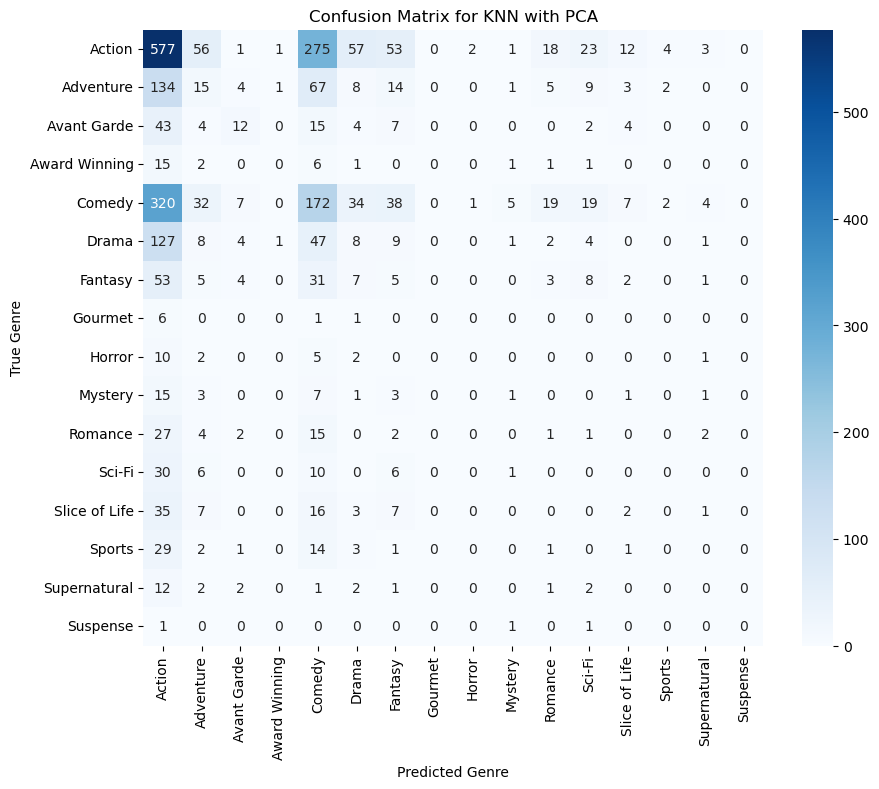

In [399]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df_model  
y = genre_df  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pca = PCA(n_components = 0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_pca, y_train)

y_pred_knn = knn.predict(X_test_pca)

y_test_labels = y_test.values.argmax(axis = 1)
y_pred_labels = y_pred_knn.argmax(axis = 1)

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize = (10, 8))
sb.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", xticklabels = y.columns, yticklabels = y.columns)
plt.title('Confusion Matrix for KNN with PCA')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.show()

Shown above is a confusion matrix of the KNN model. The model classifies anime based on the closest neighbors then it uses principal component analysis (PCA) to reduce the number of features keeping the essential ones that influence the model more. This will make it easier to process the data and possibly remove noise. Above the action square is the darkest with a 577 in it meaning the model predicted the action genre correctly 577 times. This can be a bad thing at the same time as well since the KNN model may over-predict for this genre causing other cases to have lower numbers.

After setting up the training splits the PCA is set to 0.95 which keeps 95% of the variance. After training the PCA and putting that into the KNN model, I used 3 as the n neighbor count. This means the model will consider the 3 nearest neighbors while predicting. After the model is trained the predictions are generated. Then a confusion matrix is used with a heatmap to visualize the predictions of the KNN model with how many times it correctly predicted genres.


### Conclusion

In this project I used machine learning models, logistic regression and KNN to predict anime genres using features like score, type, episode count, and member count. By using these models I aimed to categorize anime into genres based on these characteristics. Overall I learned while using these models that they can produce different outcomes even while working with the same data. Some models have strengths and weaknesses over others. 

From my observations it seems logistic regression performed well using binary classification. By treating each anime as its own case it was easy to classify them into different genres based on numerical data. It had strengths in predicting the specific genres but had some weaknesses in genre differentiation since some can be treated as sub-categories. 

KNN successfully showed its strength in grouping similar anime together based on similarities the anime shared with one another based on the features used. It successfully grouped anime along with others in the same genre category but a weakness it has is it can be sensitive to the neighbor count and established groups that get larger causing certain points to be grouped into one over and over. Using PCA with KNN helps reduce dimensionality, increasing the accuracy since the extra noise is cut off while keeping important information. 

This project shows machine learning models like logistic regression and KNN can be effective when predicting categorical data like anime genres. Though the models have their flaws that can be adjusted by tuning them more they still predicted genres based on given features. By using logistic regression and KNN techniques to train and evaluate the models it can be seen how each each produces different outcomes while using different prediction methods. 
